In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.utils import resample
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('diabetes_dataset__2019.csv')
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


Terdapat adanya missing value pada kolom pregancies, karna missing value pada kolom pregancies, BMI, Pdiabetes, Diabetic saya ingin mengisi data yang hilang/kosong tersebut dengan rata rata dari kolom Pregancies dan BMI, dan menghapus baris dataset yang memiliki nilai null pada kolom Diabetic dan Pdiabetes tersebut

In [ ]:
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
df = df.copy()
df['Pregancies'] = df['Pregancies'].fillna(df['Pregancies'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               952 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        952 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
indexes = df[df['Diabetic'].isna() | df['Pdiabetes'].isna()].index.to_list()

print(indexes)
df.drop(index= indexes,inplace = True)
df.info()

[113, 134]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               950 non-null    object 
 1   Gender            950 non-null    object 
 2   Family_Diabetes   950 non-null    object 
 3   highBP            950 non-null    object 
 4   PhysicallyActive  950 non-null    object 
 5   BMI               950 non-null    float64
 6   Smoking           950 non-null    object 
 7   Alcohol           950 non-null    object 
 8   Sleep             950 non-null    int64  
 9   SoundSleep        950 non-null    int64  
 10  RegularMedicine   950 non-null    object 
 11  JunkFood          950 non-null    object 
 12  Stress            950 non-null    object 
 13  BPLevel           950 non-null    object 
 14  Pregancies        950 non-null    float64
 15  Pdiabetes         950 non-null    object 
 16  UriationFreq      950 non-null   

In [ ]:
df.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

## Membedakan data categorical dan data numerical

In [ ]:
categorical_cols=df.select_dtypes(include=['object']).columns
df[categorical_cols].head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,Smoking,Alcohol,RegularMedicine,JunkFood,Stress,BPLevel,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,no,no,no,occasionally,sometimes,high,0,not much,no
1,50-59,Male,no,yes,less than half an hr,no,no,yes,very often,sometimes,normal,0,not much,no
2,40-49,Male,no,no,one hr or more,no,no,no,occasionally,sometimes,normal,0,not much,no
3,50-59,Male,no,no,one hr or more,no,no,no,occasionally,sometimes,normal,0,not much,no
4,40-49,Male,no,no,less than half an hr,no,no,no,occasionally,sometimes,normal,0,not much,no


In [ ]:
numerical_cols=df.select_dtypes(exclude=['object']).columns
df[numerical_cols].head()

,BMI,Sleep,SoundSleep,Pregancies
0,39.0,8,6,0.0
1,28.0,8,6,0.0
2,24.0,6,6,0.0
3,23.0,8,6,0.0
4,27.0,8,8,0.0


In [ ]:
print(df['Pregancies'].value_counts())
df['Pregancies'].fillna(value = 0.0, inplace= True)
print(df['Pregancies'].value_counts())
df['Pregancies'] = df['Pregancies'].astype(int)
df['Pregancies']

0.0    794
2.0     64
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64
0.0    794
2.0     64
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64


0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    0
951    2
Name: Pregancies, Length: 950, dtype: int64

Memperbaiki kolom kolom yang salah dalam penulisan

In [ ]:
print(df['Diabetic'].value_counts())
df['Diabetic'].replace(' no', 'no', inplace=True)
print(df['Diabetic'].value_counts())

no     683
yes    266
 no      1
Name: Diabetic, dtype: int64
no     684
yes    266
Name: Diabetic, dtype: int64


In [ ]:
print(df['RegularMedicine'].value_counts())
df['RegularMedicine'].replace('o', 'no', inplace =True)
print(df['RegularMedicine'].value_counts())

no     613
yes    336
o        1
Name: RegularMedicine, dtype: int64
no     614
yes    336
Name: RegularMedicine, dtype: int64


In [ ]:
print(df['BPLevel'].value_counts())
print(df[df['BPLevel'] == 'High'][['highBP','BPLevel']])

normal     705
high       211
low         25
High         5
Low          3
normal       1
Name: BPLevel, dtype: int64
    highBP BPLevel
191    yes    High
212     no    High
223    yes    High
226     no    High
232    yes    High


In [ ]:
df.loc[df['BPLevel']=='High','highBP'] = 'yes'
print(df[df['BPLevel'] == 'High'][['highBP','BPLevel']])

    highBP BPLevel
191    yes    High
212    yes    High
223    yes    High
226    yes    High
232    yes    High


In [ ]:
print(df['BPLevel'].value_counts())
df['BPLevel'].replace('High', 'high', inplace = True)
print(df['BPLevel'].value_counts())

df['BPLevel'].replace('normal ', 'normal', inplace = True)
df['BPLevel'].replace('Low', 'low', inplace = True)
print(df['BPLevel'].value_counts())

normal     705
high       211
low         25
High         5
Low          3
normal       1
Name: BPLevel, dtype: int64
normal     705
high       216
low         25
Low          3
normal       1
Name: BPLevel, dtype: int64
normal    706
high      216
low        28
Name: BPLevel, dtype: int64


In [ ]:
print(df['Pdiabetes'].value_counts())
df['Pdiabetes'].replace('0', 'no', inplace = True)
print(df['Pdiabetes'].value_counts())

0      935
yes     14
no       1
Name: Pdiabetes, dtype: int64
no     936
yes     14
Name: Pdiabetes, dtype: int64


In [ ]:
print(df['Alcohol'].value_counts())
df['Alcohol'].replace('0', 'no', inplace = True)
print(df['Pdiabetes'].value_counts())

no     758
yes    192
Name: Alcohol, dtype: int64
no     936
yes     14
Name: Pdiabetes, dtype: int64


In [ ]:
df["Diabetic"].value_counts()

no     684
yes    266
Name: Diabetic, dtype: int64

In [ ]:
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0,no,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0,no,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0,no,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0,no,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0,no,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0,no,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0,no,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0,no,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0,no,not much,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               950 non-null    object 
 1   Gender            950 non-null    object 
 2   Family_Diabetes   950 non-null    object 
 3   highBP            950 non-null    object 
 4   PhysicallyActive  950 non-null    object 
 5   BMI               950 non-null    float64
 6   Smoking           950 non-null    object 
 7   Alcohol           950 non-null    object 
 8   Sleep             950 non-null    int64  
 9   SoundSleep        950 non-null    int64  
 10  RegularMedicine   950 non-null    object 
 11  JunkFood          950 non-null    object 
 12  Stress            950 non-null    object 
 13  BPLevel           950 non-null    object 
 14  Pregancies        950 non-null    int64  
 15  Pdiabetes         950 non-null    object 
 16  UriationFreq      950 non-null    object 
 1

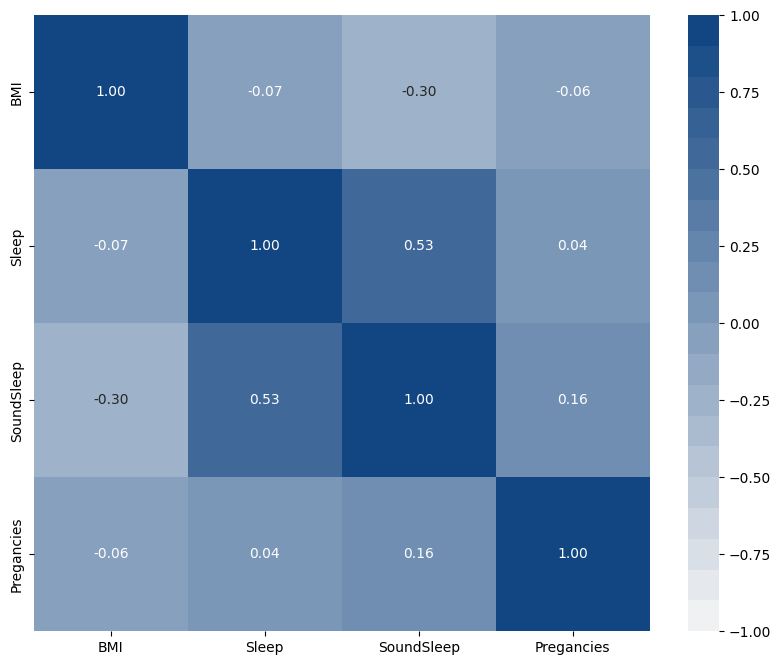

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,
cmap=sns.color_palette("light:#124683", n_colors=20),
vmin=-1.0, vmax=1.0,
square=True, ax=ax,
annot=True, fmt=".2f")
plt.show()

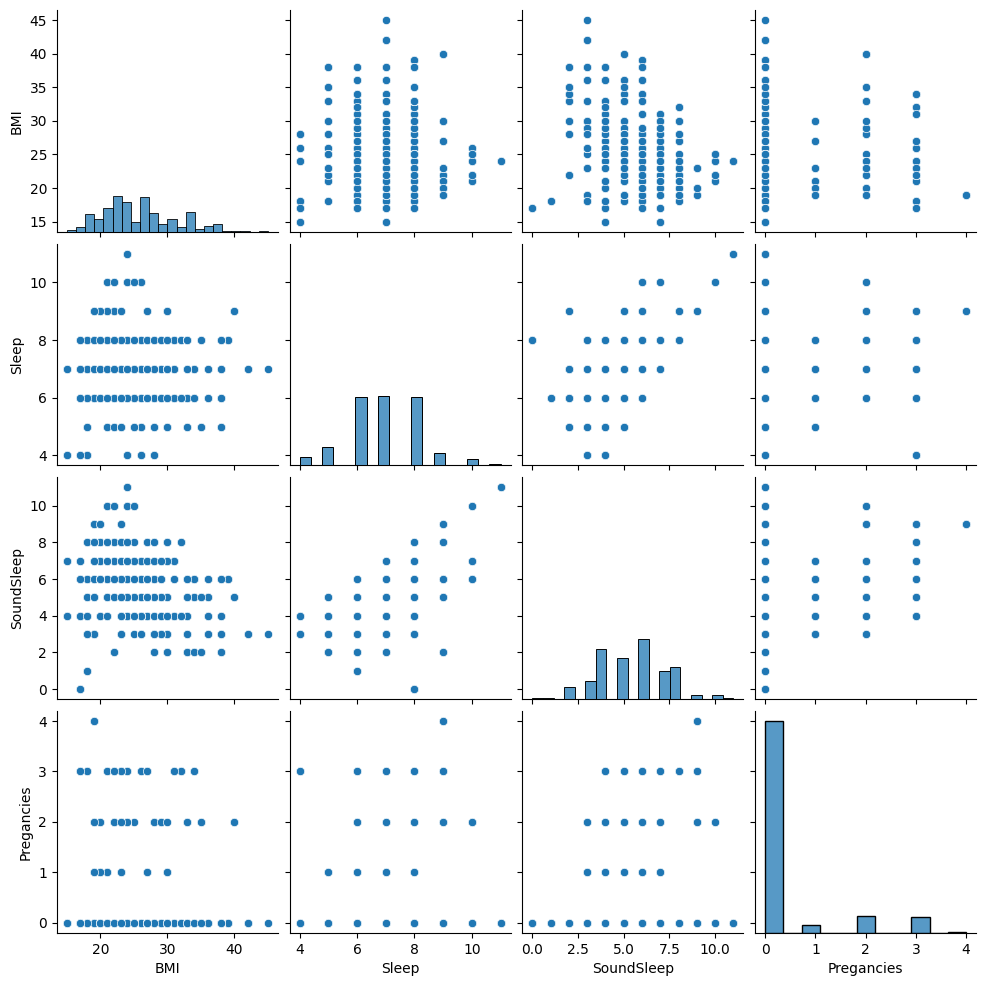

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Diabetic', ylabel='SoundSleep'>

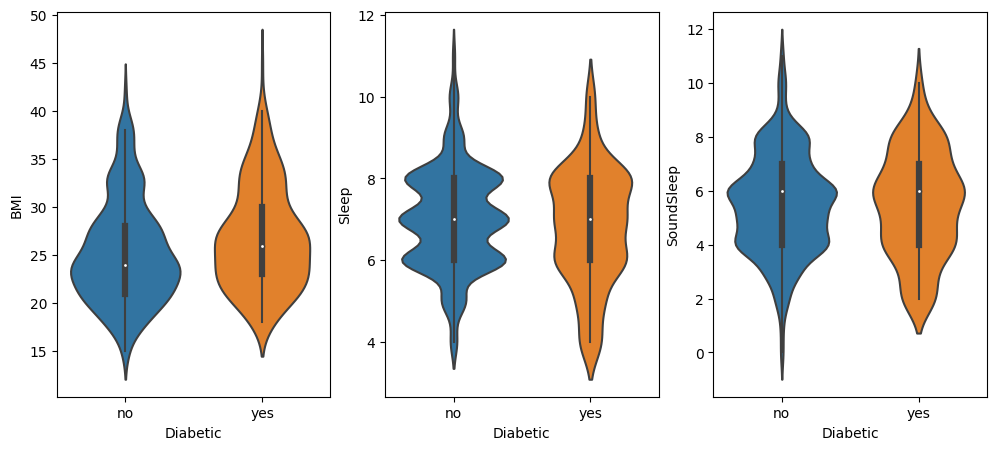

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn
fig = pyplot.figure(figsize= (12,5))
pyplot.subplot(131)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'BMI')
pyplot.subplot(132)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'Sleep')
pyplot.subplot(133)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'SoundSleep')

<ipython-input-268-b0065fec6969>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int(str(3)+str(3)+str(j+1)))


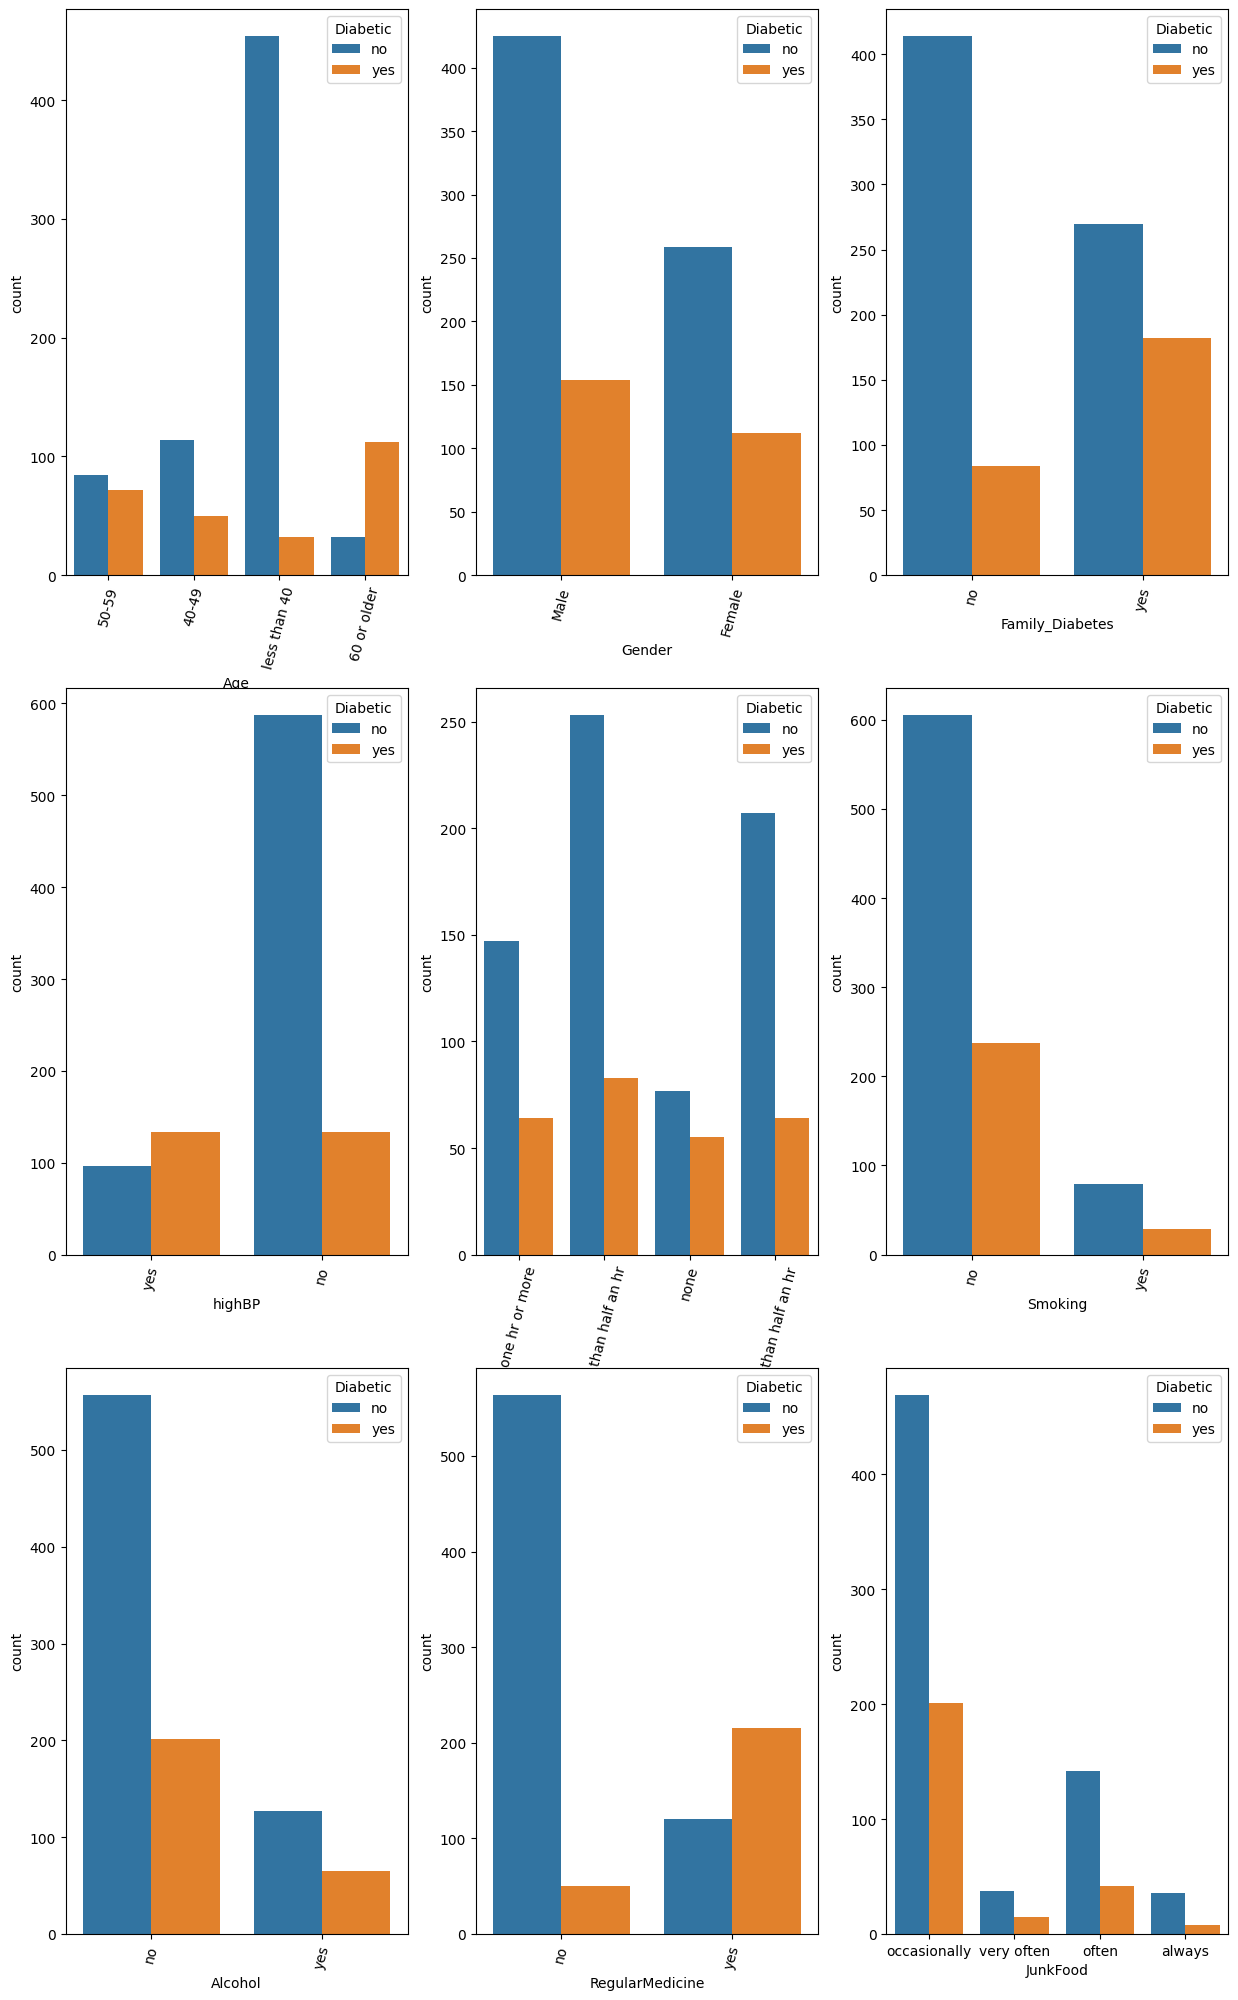

<ipython-input-268-b0065fec6969>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int(str(3)+str(3)+str(j+1)))


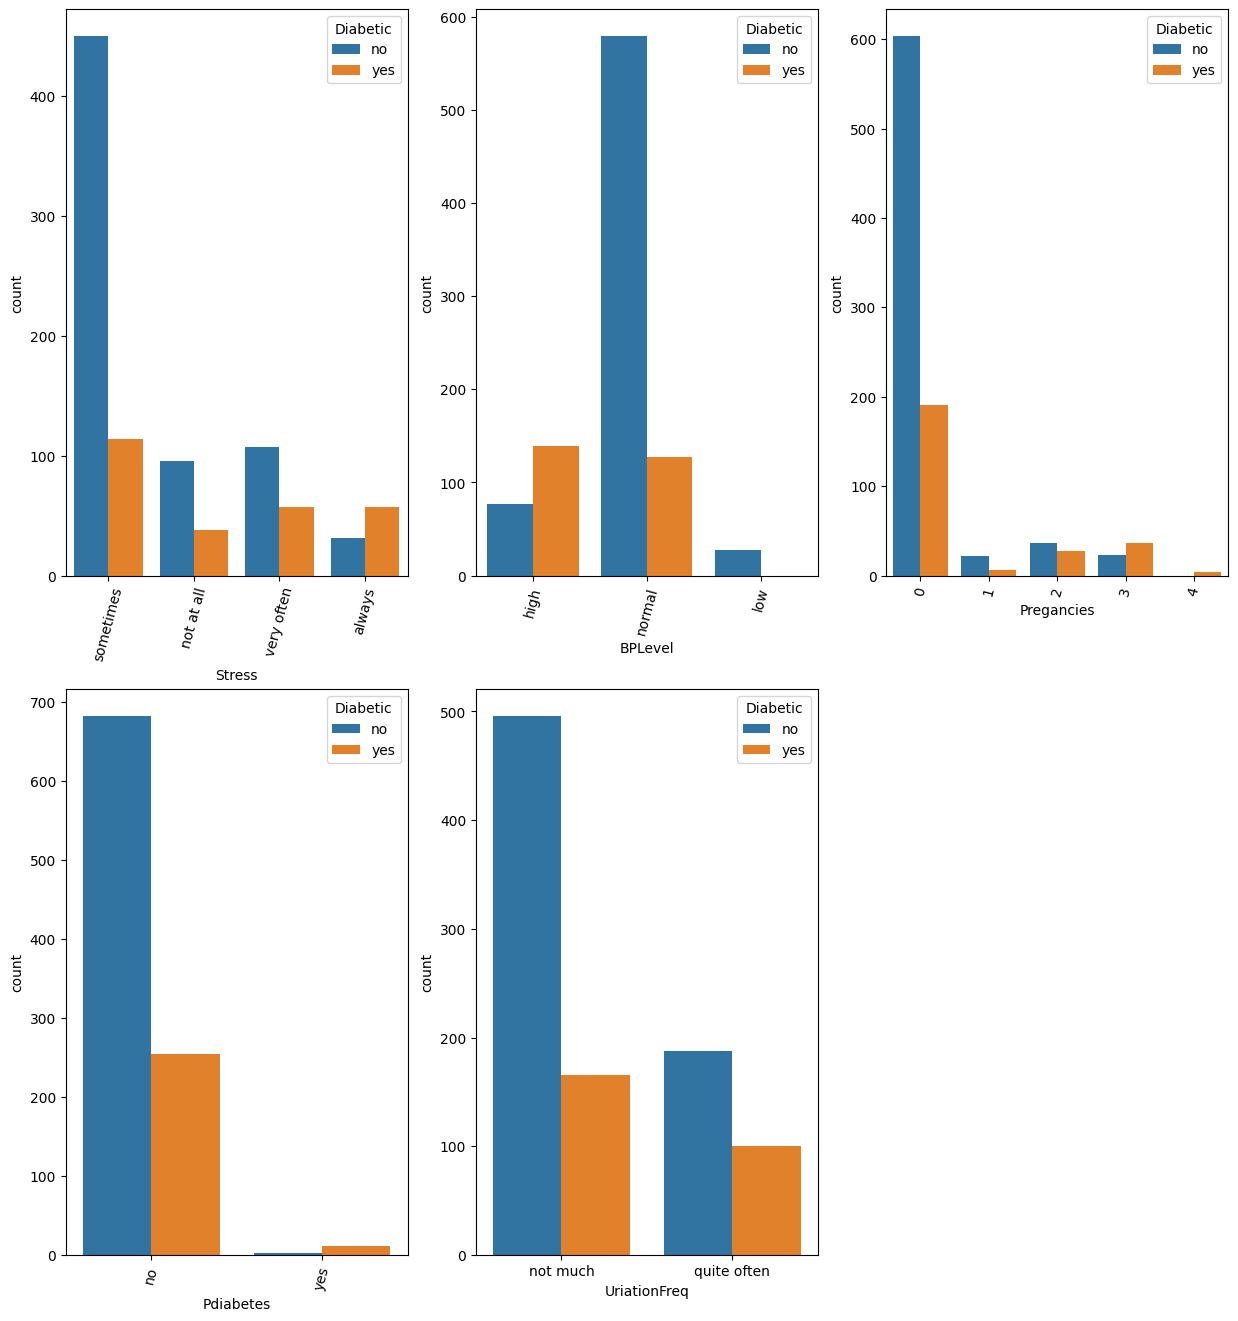

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq']

plt.figure(figsize = (15,25))

i  = 0
for j in range(9):
    plt.xticks(rotation=75)
    plt.subplot(int(str(3)+str(3)+str(j+1)))
    sns.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1
plt.show()

plt.figure(figsize = (15,25))
for j in range(5):
    plt.xticks(rotation=75)
    plt.subplot(int(str(3)+str(3)+str(j+1)))
    sns.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1

# Imbalance Problem

In [ ]:
df = df[["Age", "Gender", "Family_Diabetes", "highBP", "PhysicallyActive",
       "BMI", "Smoking", "Alcohol","Sleep", "SoundSleep", "RegularMedicine",
       "JunkFood", "Stress", "BPLevel", "Pregancies", "Pdiabetes",
       "UriationFreq", "Diabetic"]]

In [ ]:
# Convert the "Yes" and "No" value into 1 and 0
df.loc[df["Diabetic"] == "no", "Diabetic"] = 0
df.loc[df["Diabetic"] == "yes", "Diabetic"] = 1

df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0,no,not much,0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0,no,not much,0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0,no,not much,0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0,no,not much,0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0,no,not much,0


In [ ]:
# Clean the dataset
df["Diabetic"] = df["Diabetic"].astype("int")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               950 non-null    object 
 1   Gender            950 non-null    object 
 2   Family_Diabetes   950 non-null    object 
 3   highBP            950 non-null    object 
 4   PhysicallyActive  950 non-null    object 
 5   BMI               950 non-null    float64
 6   Smoking           950 non-null    object 
 7   Alcohol           950 non-null    object 
 8   Sleep             950 non-null    int64  
 9   SoundSleep        950 non-null    int64  
 10  RegularMedicine   950 non-null    object 
 11  JunkFood          950 non-null    object 
 12  Stress            950 non-null    object 
 13  BPLevel           950 non-null    object 
 14  Pregancies        950 non-null    int64  
 15  Pdiabetes         950 non-null    object 
 16  UriationFreq      950 non-null    object 
 1

In [ ]:
jumlah_no = df["Alcohol"].value_counts()["yes"]

# Cetak jumlah data "no"
print(jumlah_no)

192


In [ ]:
df.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

# Train Test Split

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# defining feature matrix(X) and response vector(y)
X = df_encoded.drop(['Diabetic'], axis=1)
y = df_encoded['Diabetic']

# train, test with SMOTE imbalance problem
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)
print("\nX_test:")
print(X_test)
print("\ny_test:")
print(y_test)

X_train:
      BMI  Sleep  SoundSleep  Pregancies  Age_50-59  Age_60 or older  \
938  34.0      6           2           0          0                0   
292  30.0      5           5           1          0                0   
546  18.0      4           3           0          0                1   
277  21.0      6           6           0          0                0   
109  24.0      8           8           0          0                0   
..    ...    ...         ...         ...        ...              ...   
106  28.0      8           8           0          0                1   
272  26.0      7           7           3          0                1   
862  23.0      7           5           0          0                0   
437  28.0      8           4           0          0                0   
102  24.0      8           8           0          0                0   

     Age_less than 40  Gender_Male  Family_Diabetes_yes  highBP_yes  ...  \
938                 0            0                

In [ ]:
# splitting X and y into training and testing sets
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

## XGB

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
rf.fit(X_train, y_train)

## SVM

In [ ]:
from sklearn.svm import SVC

# Inisialisasi model Support Vector Classifier (SVC)
svc = SVC(kernel='linear', C=1.0, random_state=42)

# Latih model pada set pelatihan
svc.fit(X_train, y_train)

# Evaluation

In [ ]:
y_xgb = xgb.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_knn = knn.predict(X_test)
y_svc = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Akurasi XGB:", accuracy_score(y_test, y_xgb))
print("Akurasi DT:",accuracy_score(y_test, y_dtree))
print("Akurasi RF:",accuracy_score(y_test, y_rf))
print("Akurasi KNN:",accuracy_score(y_test, y_knn))
print("Akurasi SVC:",accuracy_score(y_test, y_svc))

In [ ]:
from sklearn.metrics import precision_score

print("Precision XGB:",precision_score(y_test, y_xgb, average='macro'))
print("Precision DT:",precision_score(y_test, y_dtree, average='macro'))
print("Precision RF:",precision_score(y_test, y_rf, average='macro'))
print("Precision KNN:",precision_score(y_test, y_knn, average='macro'))
print("Precision SVC:",precision_score(y_test, y_svc, average='macro'))

In [ ]:
from sklearn.metrics import recall_score

print("Recall XGB:",recall_score(y_test, y_xgb, average='macro'))
print("Recall DT:",recall_score(y_test, y_dtree, average='macro'))
print("Recall RF:",recall_score(y_test, y_rf, average='macro'))
print("Recall KNN:",recall_score(y_test, y_knn, average='macro'))
print("Recall SVC:",recall_score(y_test, y_svc, average='macro'))

In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix XGB:\n",confusion_matrix(y_test, y_xgb))
print("Confusion Matrix DT:\n",confusion_matrix(y_test, y_dtree))
print("Confusion Matrix RF:\n",confusion_matrix(y_test, y_rf))
print("Confusion Matrix KNN:\n",confusion_matrix(y_test, y_knn))
print("Confusion Matrix SVC:\n",confusion_matrix(y_test, y_svc))

## Mengevaluasi dan membandingkan kinerja klasifikasi dari 5 model

auc : membedakan sebarapa baik model membedakan antara kelas positif dna kelas negatif
\
roc : memvisualisasikan trade-off antara tpr dan fpr

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_knn, pos_label=1)
print("AUC-ROC KNN:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_svc, pos_label=1)
print("AUC-ROC SVC:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_xgb, pos_label=1)
print("AUC-ROC XGB:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1)
print("AUC-ROC DT:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1)
print("AUC-ROC RF:", auc(fpr, tpr))

# Membuat laporan komperhensif tentang kinerja klasifikasi

Precision : Rasio prediksi positif yang benar-benar positif.
\
Recall    : Rasio kasus positif yang diidentifikasi dengan benar.
\
F1-score  : Harmonic mean antara precision dan recall.
\
Support   : Jumlah total sampel pada setiap kelas.

In [ ]:
from sklearn.metrics import classification_report
print("XGB:\n", classification_report(y_test, y_xgb))
print("DT:\n", classification_report(y_test, y_dtree))
print("RF:\n", classification_report(y_test, y_rf))
print("KNN:\n", classification_report(y_test, y_knn))
print("SVC:\n", classification_report(y_test, y_svc))

# Tuning Hyperparameter

untuk memperbaiki model dan meningkatkan akuarsi dalam memprediksi diabetes

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# defining feature matrix(X) and response vector(y)
X = df_encoded.drop(['Diabetic'], axis=1)
y = df_encoded['Diabetic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42],  # Set for reproducibility
    'class_weight': [None, 'balanced']
}

# Create the grid search object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Test Accuracy: {accuracy}')